## Decision Tree
결정 트리는 입력 변수를 특정한 기준으로 잘라(분기) 트리 형태의 구조로 분류를 하는 모델입니다.<br>

<img src='img/DTDesc.png' style="height: 300px"  />
<br>

* 사람의 논리적 사고 방식을 모사하는 분류 방법론
* IF-THEN rule의 조합으로 class 분류
* 결과를 나무 모양으로 그릴 수 있음
* Greedy 한 알고리즘 (한번 분기하면 이후에 최적의 트리 형태가 발견되더라도 되돌리지 않음, 최적의 트리 생성을 보장하지 않음)
* 축에 직교하는 분기점
* 데이터 전처리가 필요 없음


#### 불순도(Impurity, Entropy)
결정 트리는 데이터의 불순도를 최소화 할 수 있는 방향으로 트리를 분기합니다. <br>
불순도란 정보 이론(Information Theory)에서 말하는 얻을 수 있는 정보량이 많은 정도를 뜻합니다. <br>
ex) 오늘 해가 동쪽에서 뜰꺼야 -> 낮은 정보량, 오늘 일식이 일어날꺼야 -> 높은 정보량 <br>

결정 트리 모델은 Sklearn의 tree 패키지에있음.


In [7]:
!pip install graphviz

In [8]:
iris_data.head(2)

NameError: name 'iris_data' is not defined

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

iris = load_iris()
data = iris.data
label = iris.target
columns = iris.feature_names
irisDF = pd.DataFrame(data, columns = columns)
irisDF.head()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, label, 
                                test_size=0.2, shuffle=True, stratify=label, random_state=2019)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 학습하기 --- (*4)
dModel = DecisionTreeClassifier(random_state=153)     
dModel.fit(x_train, y_train)

# 평가하기 --- (*5)
y_pred = dModel.predict(x_test)
print("★ 정답률 = " , accuracy_score(y_test, y_pred))

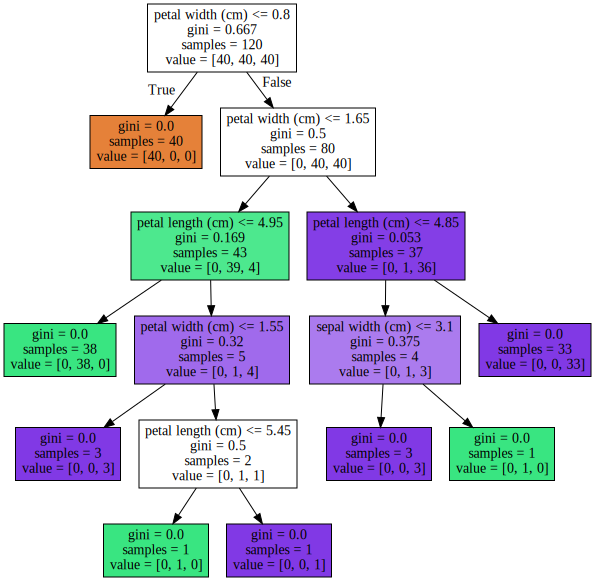

In [9]:
#다운로드 https://graphviz.gitlab.io/_pages/Download/Download_windows.html
#Graphviz설치
#환경변수 path추가 : C:\Program Files (x86)\Graphviz2.38\bin

from sklearn.tree import export_graphviz
import graphviz
# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
#class_names : 결정class의 명칭 
#impurity=True : 불순도 ...gini 계수값이 출력된다. 
#filled=True  : 색깔 

export_graphviz(dModel, out_file="tree.dot",  \
              feature_names = iris.feature_names, impurity=True, filled=True) 

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


# max_depth=3 

In [10]:
from sklearn.tree import DecisionTreeClassifier

# 학습하기 --- (*4)
dModel = DecisionTreeClassifier(random_state=153, max_depth=3)     
dModel.fit(x_train, y_train)

# 평가하기 --- (*5)
y_pred = dModel.predict(x_test)
print("★ 정답률 = " , accuracy_score(y_test, y_pred))

feature_importance = pd.DataFrame(dModel.feature_importances_.reshape((1, -1)),
                                  columns=columns, index=['feature_importance'])
feature_importance

★ 정답률 =  0.9666666666666667


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
feature_importance,0.0,0.0,0.079347,0.920653


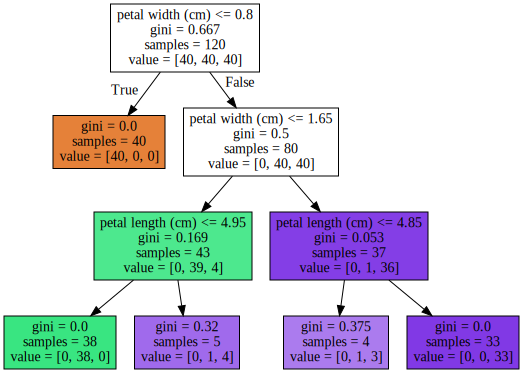

In [11]:
from sklearn.tree import export_graphviz
import graphviz
# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
#class_names : 결정class의 명칭 
#impurity=True : 불순도 ...gini 계수값이 출력된다. 
#filled=True  : 색깔 

export_graphviz(dModel, out_file="tree.dot",   \
              feature_names =  iris.feature_names, impurity=True, filled=True) 

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


# min_samples_split=4

In [12]:
#sample이 4개일때까지만 나눈다...... 더 적다면 더 이상 나누지않음 
from sklearn.tree import DecisionTreeClassifier
# 학습하기 --- (*4)
dModel = DecisionTreeClassifier(random_state=156, min_samples_split=4)
dModel.fit(x_train, y_train)

# 평가하기 --- (*5)
y_pred = dModel.predict(x_test)
print("★ 정답률 = " , accuracy_score(y_test, y_pred))
# 정답률이 매우 높음 ......분류를 제대로 함 .....계속실행하면 정답률 변경 .....0.96


★ 정답률 =  0.9666666666666667


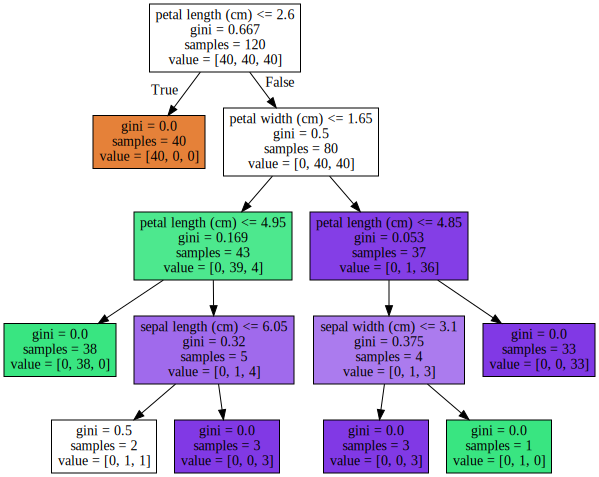

In [13]:
from sklearn.tree import export_graphviz
import graphviz
# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
#class_names : 결정class의 명칭 
#impurity=True : 불순도 ...gini 계수값이 출력된다. 
#filled=True  : 색깔 

export_graphviz(dModel, out_file="tree2.dot",   \
              feature_names =  iris.feature_names, impurity=True, filled=True) 

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree2.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# min_samples_leaf=4

In [14]:

# 학습하기 --- (*4)
dModel = DecisionTreeClassifier(random_state=156, min_samples_leaf=4)
dModel.fit(x_train, y_train)

# 평가하기 --- (*5)
y_pred = dModel.predict(x_test)
print("★ 정답률 = " , accuracy_score(y_test, y_pred))
# 정답률이 매우 높음 ......분류를 제대로 함 .....계속실행하면 정답률 변경 .....0.96


★ 정답률 =  0.9666666666666667


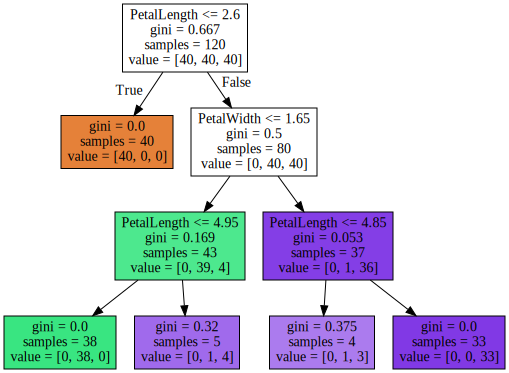

In [15]:
from sklearn.tree import export_graphviz
import graphviz
# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
#class_names : 결정class의 명칭 
#impurity=True : 불순도 ...gini 계수값이 출력된다. 
#filled=True  : 색깔 

export_graphviz(dModel, out_file="tree3.dot",   \
              feature_names = ["SepalLength","SepalWidth","PetalLength","PetalWidth"], impurity=True, filled=True) 

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree3.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [16]:
dModel.feature_importances_

array([0.        , 0.        , 0.59950273, 0.40049727])

In [17]:
pd.DataFrame(dModel.feature_importances_.reshape((1, -1)),columns=columns)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.0,0.0,0.599503,0.400497


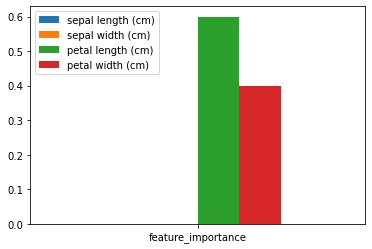

In [18]:
# 시각화 
#위에서 feature의 중요도를 보니 petal length와 petal width가 높았다......이를 가지고 분류해본다.....
feature_importance = pd.DataFrame(dModel.feature_importances_.reshape((1, -1)),
                                  columns=columns, index=['feature_importance'])
feature_importance.plot(kind="bar",rot=0  )


In [ ]:
#2,3칼럼의 중요도가 높다. 이를 이용하여 산점도를 그리니 분류됨 

In [19]:
import matplotlib.pyplot as plt
irisDF.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

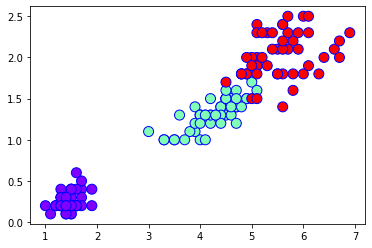

In [20]:
plt.scatter(irisDF.iloc[:, 2], 
             irisDF.iloc[:, 3],
             marker='o', c=iris.target, s=100, 
             cmap='rainbow', edgecolor='b')

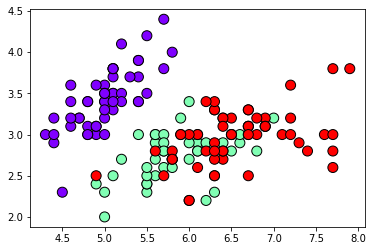

In [21]:
#칼럼을 0,1 칼럼으로 하는 것보다 2,3 칼럼으로 분류하는 것이 훠씬 효과적임을 확인한다. 
import matplotlib.pyplot as plt

plt.scatter(irisDF.iloc[:, 0], irisDF.iloc[:, 1], marker='o', c=iris.target, s=100, cmap='rainbow', edgecolor='k') 


## 결정 트리의 Decsion Boundary 시각화

### 분류를 위한 test용 데이터만들기 

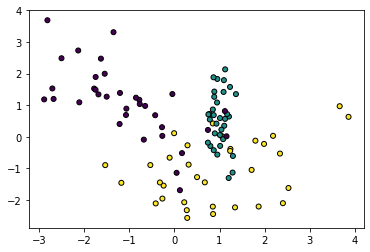

In [22]:
#분류를 위한 test용 데이터만들기 
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt 

#2개의 피처와 3가지 유형의 class값을 가지는 dataset만들기

X_features, y_labels = make_classification(n_features=2, n_redundant=0, 
                                           n_classes=3, n_clusters_per_class=1, random_state=0)


# n_samples : 표본 데이터의 수, 디폴트 100
# n_features : 독립 변수의 수, 디폴트 20
# n_informative : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2
# n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2    ***주의 
# n_repeated : 독립 변수 중 단순 중복된 성분의 수, 디폴트 0
# n_classes : 종속 변수의 클래스 수, 디폴트 2
# n_clusters_per_class : 클래스 당 클러스터의 수, 디폴트 2
# weights : 각 클래스에 할당된 표본 수
# random_state : 난수 발생 시드

plt.scatter(X_features[:,0], X_features[:,1], marker="o", c=y_labels, s=25, edgecolors="black")


In [24]:
set(y_labels)

{0, 1, 2}

In [25]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

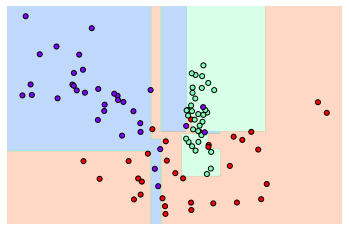

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

# 일부 이상치 데이터를 분류하기 위해 분할이 자주 일어나서
# 결정기준 경계가 매우 많아졌다.
# 복잡한 모델은 데이터세트의 특성과 약간만 다른 형태의 
# 데이터세트를 예측하면 예측정확도가 떨어진다. 

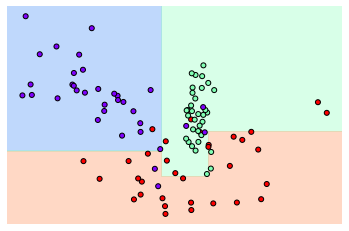

In [27]:
#6개 이하의 데이터는 leaf node를 생성할 수 있도록 리프노드 생성 규칙을 완화한 뒤 하이퍼파라메터를 변경
#이상치에 크게 반응하지 않으며 좀 더 일반화된 분류 규칙에 따라 분류됨 

dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

###  iris data

In [28]:
X_features1 = iris.data[:,[0,1]]  
X_features2 = iris.data[:,[2,3]]  
y_labels = iris.target


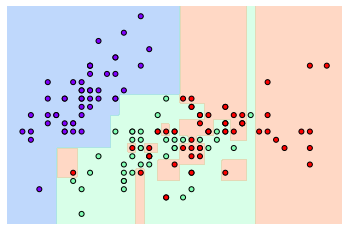

In [29]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features1, y_labels)
visualize_boundary(dt_clf, X_features1, y_labels)

#일부 이상치 데이터까지 분류하기 위해 분할이 자주 일어나서 결정 기준 경계가 매우 많다.

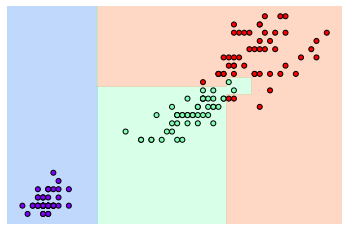

In [30]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier().fit(X_features2, y_labels)
visualize_boundary(dt_clf, X_features2, y_labels)

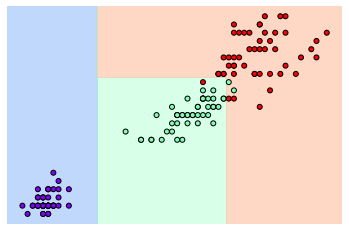

In [31]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
#6개 이하의 데이터는 리프노드를 생성할 수 있도록 리프노드 생성규칙을 완화
#이상치에 크게 반응하지 않으면서 좀 더 일반화된 분류 규칙에 따라 분류된다. 
#다음 모델이 더 뛰어날 가능성이 높다. 
#학습세트에 지나치게 최적화된 분류는 오히려 테스트 데이터 세트에서 정확도를 떨어뜨릴수 있기 때문이다. 

dt_clf = DecisionTreeClassifier( min_samples_leaf=6).fit(X_features2, y_labels)
visualize_boundary(dt_clf, X_features2, y_labels)

# GridSearchCV

GridSearchCV 클래스는 validation_curve 함수와 달리 모형 래퍼(Wrapper) 성격의 클래스이다. 
클래스 객체에 fit 메서드를 호출하면 grid search를 사용하여 자동으로 복수개의 내부 모형을 생성하고
이를 모두 실행시켜서 최적 파라미터를 찾아준다. 생성된 복수개와 내부 모형과 실행 결과는 다음 속성에 저장된다.

+ grid_scores_
    +param_grid 의 모든 파리미터 조합에 대한 성능 결과. 각각의 원소는 다음 요소로 이루어진 튜플이다.
+ parameters: 사용된 파라미터
+ mean_validation_score: 교차 검증(cross-validation) 결과의 평균값
+ cv_validation_scores: 모든 교차 검증(cross-validation) 결과
+ best_score_ : 최고 점수
+ best_params : 최고 점수를 낸 파라미터
+ best_estimator_ : 최고 점수를 낸 파라미터를 가진 모형

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.2, random_state=11)

model = DecisionTreeClassifier(random_state=156)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=156)

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
params = {
    'max_depth' : [ 4,6,8,10],
    'min_samples_leaf' : [ 4,6,8,10],
    'min_samples_split' : [ 4,6,8,10]
}

grid_cv = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(x_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)
print('best_estimator_:', grid_cv.best_estimator_)
pre = grid_cv.predict(x_test)
acScore = metrics.accuracy_score(y_test,pre)
print('acScore:', acScore)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GridSearchCV 최고 평균 정확도 수치:0.9583
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 4}
best_estimator_: DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=4,
                       random_state=126)
acScore: 0.9666666666666667


[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    1.4s finished


In [ ]:
# grid_cv.cv_results_

In [34]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[["param_max_depth","mean_test_score"]]
cv_results_df
#트리의 깊이가 깊을수록 학습세트에는 올바른 예측 결과를 가져오지만 
#검증데이터세트에는 오히려 과적합으로 인한 성능저하를 유발한다. 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000800,0.000400,0.0004,0.000490,4,4,4,"{'max_depth': 4, 'min_samples_leaf': 4, 'min_s...",0.916667,0.916667,1.0,0.958333,0.958333,0.95,0.03118,1
1,0.000600,0.000490,0.0006,0.000490,4,4,6,"{'max_depth': 4, 'min_samples_leaf': 4, 'min_s...",0.916667,0.916667,1.0,0.958333,0.958333,0.95,0.03118,1
2,0.000600,0.000490,0.0002,0.000400,4,4,8,"{'max_depth': 4, 'min_samples_leaf': 4, 'min_s...",0.916667,0.916667,1.0,0.958333,0.958333,0.95,0.03118,1
3,0.000800,0.000400,0.0000,0.000000,4,4,10,"{'max_depth': 4, 'min_samples_leaf': 4, 'min_s...",0.916667,0.916667,1.0,0.958333,0.958333,0.95,0.03118,1
4,0.000600,0.000490,0.0004,0.000490,4,6,4,"{'max_depth': 4, 'min_samples_leaf': 6, 'min_s...",0.916667,0.916667,1.0,0.958333,0.958333,0.95,0.03118,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.000599,0.000489,0.0004,0.000489,10,8,10,"{'max_depth': 10, 'min_samples_leaf': 8, 'min_...",0.916667,0.916667,1.0,0.958333,0.958333,0.95,0.03118,1
60,0.000799,0.000400,0.0002,0.000400,10,10,4,"{'max_depth': 10, 'min_samples_leaf': 10, 'min...",0.916667,0.916667,1.0,0.958333,0.958333,0.95,0.03118,1
61,0.000800,0.000400,0.0002,0.000400,10,10,6,"{'max_depth': 10, 'min_samples_leaf': 10, 'min...",0.916667,0.916667,1.0,0.958333,0.958333,0.95,0.03118,1
62,0.000400,0.000490,0.0004,0.000490,10,10,8,"{'max_depth': 10, 'min_samples_leaf': 10, 'min...",0.916667,0.916667,1.0,0.958333,0.958333,0.95,0.03118,1


In [35]:
grid_cv.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=4,
                       random_state=156)

In [36]:
best = grid_cv.best_estimator_
pred = best.predict(x_test)
accuracy = accuracy_score(y_test, pred)
accuracy

0.9333333333333333

In [37]:
best.feature_importances_

array([0.00594727, 0.        , 0.5459484 , 0.44810433])

# preprocessing

데이터를 의사결정나무(Decision Tree) 계열의 머신러닝(Machine Learning) 알고리즘에 넣기 위해서는, 
데이터를 머신러닝 알고리즘이 이해할 수 있는 형태로 변환해야 하는데 이 과정을 전문용어로 전처리(Preprocessing)라고 한다.

scikit-learn 에서 제공하는 머신러닝 알고리즘에 데이터를 넣을 수 있는 기본 조건

- 모든 데이터는 숫자(정수형, 소수점 등)로 구성되어 있어야 한다.
- 데이터에 빈 값이 없어야 한다.

In [ ]:
## 숫치가 아닌 문제를 Deep Learning에서 다루기가 어렵습니다.
## iris data의 target이 문자이지만 독립변수들은 숫자임 

In [38]:
iris_data.info()

NameError: name 'iris_data' is not defined

In [39]:
#target이 문자데이터인 경우 
iris_data = pd.read_csv("iris.csv")
iris_data = iris_data.rename({"variety":"Name"}, axis=1)

x = iris_data.drop("Name", axis=1)
y = iris_data["Name"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=121)

model = DecisionTreeClassifier(random_state=126)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("정답률=", accuracy_score(y_test, y_pred))  

정답률= 0.9666666666666667


In [40]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [41]:
iris_data = pd.read_csv("iris.csv")
iris_data = iris_data.rename({"variety":"Name"}, axis=1)
iris_data.head(1)

,sepal.length,sepal.width,petal.length,petal.width,Name
0,5.1,3.5,1.4,0.2,Setosa


In [42]:
arr = pd.unique(iris_data["Name"])
arr

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [43]:
y_labels = iris_data["Name"]

labels = { arr[0]:0,  arr[1]:1,   arr[2] :2}
y_labels_nums = list(map(lambda v : labels[v], y_labels))
print(y_labels_nums)

sum( iris.target == y_labels_nums)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


150

In [44]:
#y_labels의 문자값을 One-hot벡터 형식으로 바꾸기
y_labels = iris_data["Name"]
labels = { 'Setosa':[1,0,0],  'Versicolor':[0,1,0],   'Virginica' :[0,0,1]}
y_labels_nums = list(map(lambda v : labels[v], y_labels))
#y_labels_nums

### 사이킷으로 One-hot벡터 형식으로 바꾸기

In [45]:
iris_data['Name']

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: Name, Length: 150, dtype: object

In [46]:
# category value를 수치화 시키기 
from sklearn.preprocessing import LabelEncoder

#방법1
encoder = LabelEncoder()
labels = encoder.fit_transform(iris_data['Name'])
labels
#방법2
# encoder.fit(iris_data['Name'])
# labels = encoder.transform(iris_data['Name'])
# labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [47]:
#encoder.inverse_transform(labels)

In [48]:
from sklearn.preprocessing import LabelEncoder

items = ["TV","냉장고","전자레인지","컴퓨터","선풍기","선풍기","phone","phone"]
encoder = LabelEncoder()
labels = encoder.fit_transform(items)
labels

array([0, 2, 4, 5, 3, 3, 1, 1], dtype=int64)

In [49]:
encoder.inverse_transform([0, 2, 4, 5, 3, 3, 1, 1])

array(['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', 'phone', 'phone'],
      dtype='<U5')

In [50]:
labels

array([0, 2, 4, 5, 3, 3, 1, 1], dtype=int64)

In [51]:
#숫자값에 따른 순서나 중요도로 인식되어서는 안된다. 
#One - Hot - Encoding
from sklearn.preprocessing import OneHotEncoder
#2차원으로 바꾸기 
labels = labels.reshape(-1,1) 
#print(labels)
oh_encoder = OneHotEncoder()
oh_labels = oh_encoder.fit_transform(labels)
oh_labels.toarray()

array([[1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]])

In [52]:
#간단한 방법 
items = ["TV","냉장고","전자레인지","컴퓨터","선풍기","선풍기","phone","phone"]
df = pd.DataFrame({"items":items})
pd.get_dummies(df)

,items_TV,items_phone,items_냉장고,items_선풍기,items_전자레인지,items_컴퓨터
0,1,0,0,0,0,0
1,0,0,1,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,1,0,0,0,0
7,0,1,0,0,0,0
